In [ ]:
pip install sklearn

In [ ]:
!pip install yfinance

In [ ]:
pip install constants


In [ ]:
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import pandas as pd

import pprint
from sklearn.impute import SimpleImputer

# Visualization
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import libraries
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
import tensorflow as tf
import os
import constants as CONST


In [ ]:
df = pd.read_csv('GIAA.csv')
df

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-08-01,496,496,491,496,"4,412,814,000"
1,2013-08-02,496,506,491,491,"5,084,768,000"
2,2013-08-12,491,506,491,496,"1,423,554,000"
3,2013-08-13,496,496,491,491,"1,564,699,000"
4,2013-08-14,491,506,491,496,"5,571,216,000"
...,...,...,...,...,...,...
2439,2023-08-25,96,96,95,96,"235,324,100,000"
2440,2023-08-28,105,105,87,89,"1,207,570,900,000"
2441,2023-08-29,82,91,82,90,"487,701,900,000"
2442,2023-08-30,92,93,88,90,"183,152,300,000"


In [ ]:
df.isnull().sum()

DATE      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2444 non-null   object
 1   OPEN    2444 non-null   int64 
 2   HIGH    2444 non-null   int64 
 3   LOW     2444 non-null   int64 
 4   CLOSE   2444 non-null   int64 
 5   VOLUME  2444 non-null   object
dtypes: int64(4), object(2)
memory usage: 114.7+ KB


#EDA

In [ ]:
df.describe()

,OPEN,HIGH,LOW,CLOSE
count,2444.000000,2444.000000,2444.000000,2444.000000
mean,341.709902,347.969313,336.596563,341.244681
std,129.428340,132.598926,126.850165,129.397808
min,50.000000,53.000000,50.000000,51.000000
25%,222.000000,222.000000,222.000000,222.000000
50%,338.000000,344.000000,332.500000,338.000000
75%,454.000000,460.000000,445.000000,454.000000
max,635.000000,650.000000,620.000000,635.000000


In [ ]:
print(df["CLOSE"])

0       496
1       491
2       496
3       491
4       496
       ... 
2439     96
2440     89
2441     90
2442     90
2443     90
Name: CLOSE, Length: 2444, dtype: int64


#VISUALISASI

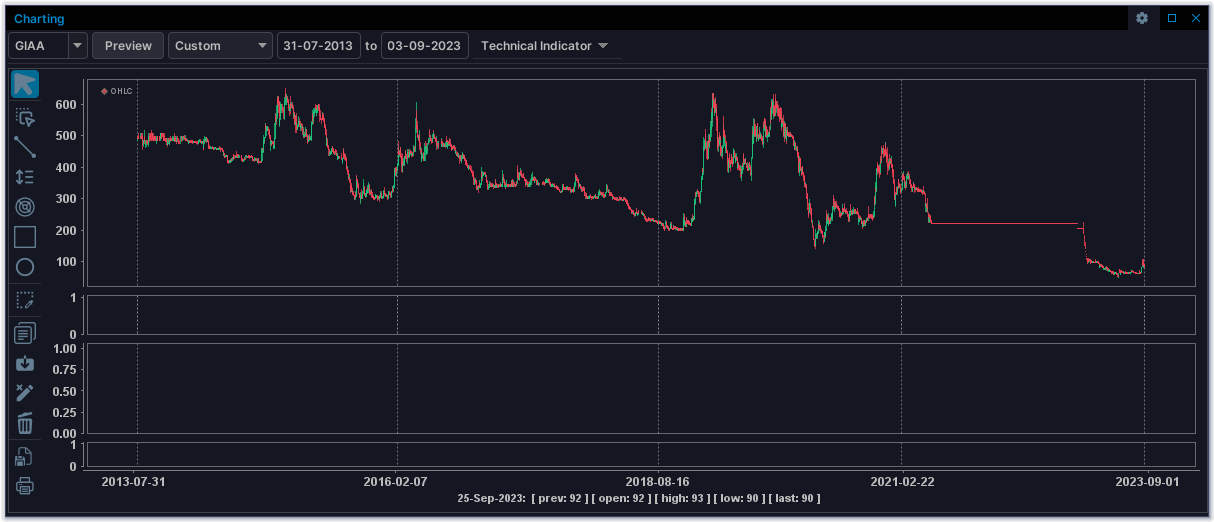

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['DATE'],
                open=df['OPEN'],
                high=df['HIGH'],
                low=df['LOW'],
                close=df['CLOSE'])])

# Add a title to the plot
fig.update_layout(title="CHART SAHAM GIAA 2013-2023")

fig.update_xaxes(title_text="Tahun")
fig.update_yaxes(title_text="Jumlah")

fig.show()

<ipython-input-11-f24be63dd2dd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



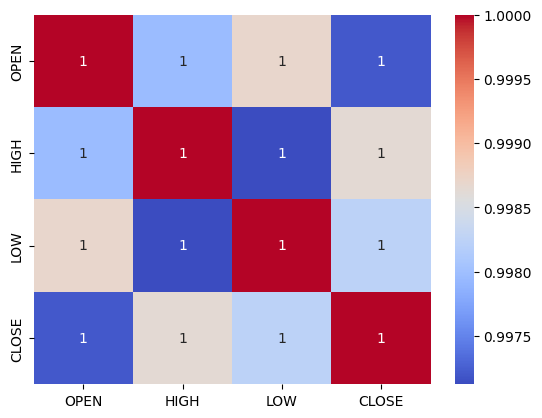

In [ ]:
#melihat korelasi
sns.heatmap(df[["OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]].corr(), cmap="coolwarm", annot=True)
plt.show()

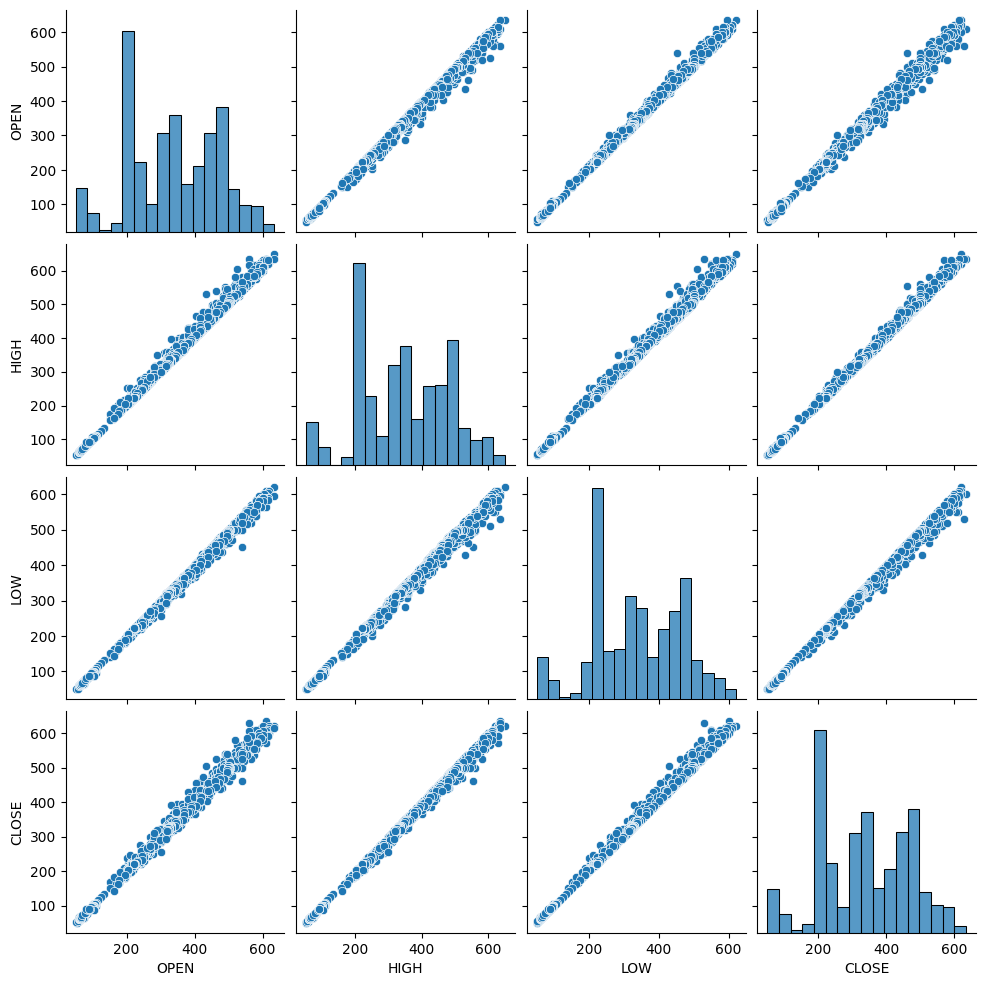

In [ ]:
sns.pairplot(df)

In [ ]:

df = pd.DataFrame(data=df, columns=["CLOSE"])

df = df.values

training_data_len = math.ceil(len(df) * .80)
test_data=int(len(df)*0.2)

#data latih
print(f"training_data: {training_data_len}")

#data uji
print(f"test_data: {test_data}")


training_data: 1956
test_data: 488


In [ ]:
train, test = df[:-test_data], df[-test_data:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape


((1956, 1), (1956,), (488, 1), (488,))

In [ ]:
df = pd.DataFrame(data=df, columns=["CLOSE"])
df = df.values
training_data_len = math.ceil(len(df) * .80)
test_data = int(len(df) * 0.2)
train_data = df[:training_data_len]
test_data = df[training_data_len:]





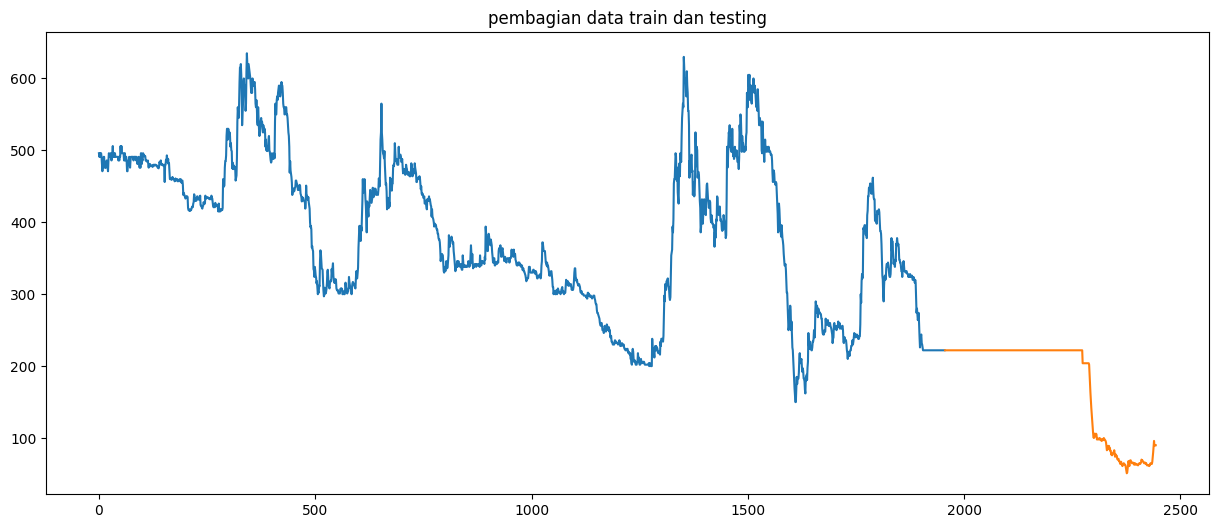

In [ ]:
fig, ax = plt.subplots (1,1,figsize=(15,6))
plt.title("pembagian data train dan testing")
ax.plot(x_train, train)
ax.plot(x_test, test)

In [ ]:

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.7619863 ],
       [0.75342466],
       [0.7619863 ],
       ...,
       [0.06678082],
       [0.06678082],
       [0.06678082]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)



[array([0.7619863 , 0.75342466, 0.7619863 , 0.75342466, 0.7619863 ,
       0.7619863 , 0.75342466, 0.73630137, 0.71917808, 0.73630137,
       0.74486301, 0.75342466, 0.75342466, 0.72773973, 0.72773973,
       0.73630137, 0.72773973, 0.73630137, 0.74486301, 0.73630137,
       0.72773973, 0.71917808, 0.74486301, 0.7619863 , 0.75342466,
       0.75342466, 0.75342466, 0.7619863 , 0.7619863 , 0.74486301,
       0.7619863 , 0.7619863 , 0.77910959, 0.75342466, 0.7619863 ,
       0.75342466, 0.75342466, 0.7619863 , 0.75342466, 0.75342466,
       0.75342466, 0.75342466, 0.75342466, 0.75342466, 0.75342466,
       0.74486301, 0.75342466, 0.74486301, 0.75342466, 0.75342466,
       0.77910959, 0.7619863 , 0.77910959, 0.7619863 , 0.7619863 ,
       0.7619863 , 0.7619863 , 0.7619863 , 0.74486301, 0.74486301])]
[0.761986301369863]
[array([0.7619863 , 0.75342466, 0.7619863 , 0.75342466, 0.7619863 ,
       0.7619863 , 0.75342466, 0.73630137, 0.71917808, 0.73630137,
       0.74486301, 0.75342466, 0.75342

In [ ]:

x_train, y_train = np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_test shape:", x_train.shape)
print("y_test shape:", y_train.shape)


x_train shape: (1896, 60, 1)
y_train shape: (1896,)
x_test shape: (1896, 60, 1)
y_test shape: (1896,)


In [ ]:
from tensorflow.keras.metrics import MeanAbsoluteError

model = Sequential()

model.add(LSTM(68, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences = False))

model.add(Dense(128))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', MeanAbsoluteError()])

history = model.fit(x_train, y_train, batch_size=12, epochs=30, validation_data=(x_train, y_train))

train_loss, train_mse, train_mae = model.evaluate(x_train, y_train)
val_loss, val_mse, val_mae = model.evaluate(x_train, y_train)

print(f'Loss pada data latih: {train_loss}')
print(f'Mean Squared Error pada data latih: {train_mse}')
print(f'Mean Absolute Error pada data latih: {train_mae}')

print(f'Loss pada data validasi: {val_loss}')
print(f'Mean Squared Error pada data validasi: {val_mse}')
print(f'Mean Absolute Error pada data validasi: {val_mae}')


Epoch 1/30
158/158 [==============================] - 15s 32ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0452 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0372
Epoch 2/30
158/158 [==============================] - 3s 20ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0285 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0215
Epoch 3/30
158/158 [==============================] - 4s 23ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0276 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0298
Epoch 4/30
158/158 [==============================] - 3s 22ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0234 - val_loss: 7.6898e-04 - val_mean_squared_error: 7.6898e-04 - val_mean_absolute_error: 0.0177
Epoch 5/30
158/158 [==============================] - 2s 12ms/step - loss: 0.0010 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 68)            19040     
                                                                 
 lstm_1 (LSTM)               (None, 128)               100864    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 136545 (533.38 KB)
Trainable params: 136545 (533.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [ ]:
test_data = scaled[training_data_len - 60:, :]
x_test = []
y_test = df[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])




In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.7619863 ],
       [0.75342466],
       [0.7619863 ],
       ...,
       [0.29280822],
       [0.29280822],
       [0.29280822]])

In [ ]:
predictions = model.predict(x_test)



16/16 [==============================] - 1s 4ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)




In [ ]:
# type(valid)

In [ ]:
print(df)

[[496]
 [491]
 [496]
 ...
 [ 90]
 [ 90]
 [ 90]]


In [ ]:
print(df.shape)

(2444, 1)


In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]


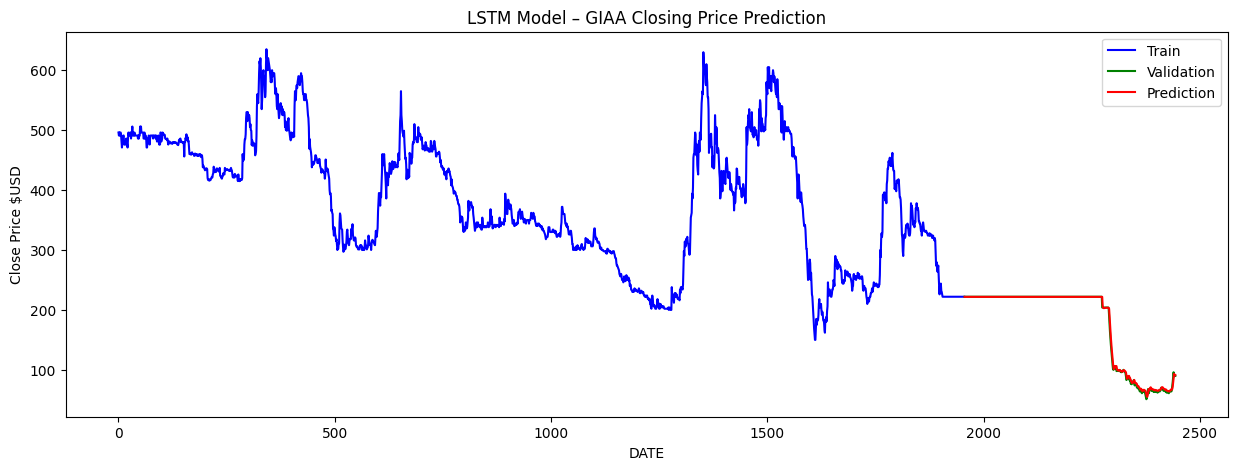

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("LSTM Model – GIAA Closing Price Prediction")
plt.xlabel("DATE", fontsize=10)
plt.plot(range(len(train)), train, color='blue', label='Train')
plt.plot(range(len(train), len(train) + len(valid)), valid, color='green', label='Validation')
plt.plot(range(len(train), len(train) + len(valid)), predictions, color='red', label='Prediction')

plt.legend()
plt.show()



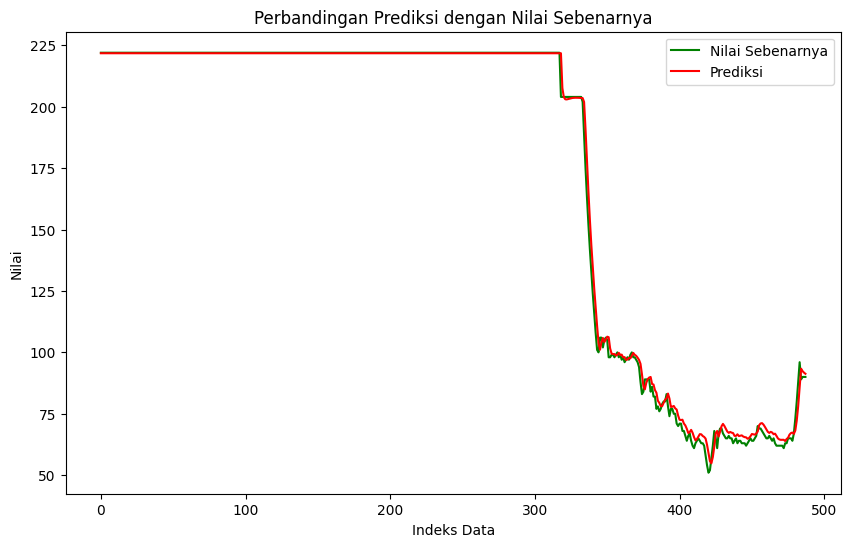

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Nilai Sebenarnya', color='green')
plt.plot(predictions, label='Prediksi', color='red')
plt.title('Perbandingan Prediksi dengan Nilai Sebenarnya')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()



In [ ]:
import numpy as np

def calculate_mae(y_test,predictions):
    return np.mean(np.abs(y_test - predictions))

def calculate_rmse(y_test,predictions):
    return np.sqrt(np.mean(np.square(y_test - predictions)))

def calculate_mape(y_test,predictions):
    return np.mean(np.abs((y_test - predictions) / predictions)) * 100

def calculate_rmspe(y_test,predictions):
    return np.sqrt(np.mean(np.square((y_test - predictions) / predictions))) * 100

mae = calculate_mae(y_test,predictions)
rmse = calculate_rmse(y_test,predictions)
mape = calculate_mape(y_test,predictions)
rmspe = calculate_rmspe(y_test,predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe}%")


Mean Absolute Error (MAE): 1.2825005171728916
Root Mean Squared Error (RMSE): 2.740107780090096
Mean Absolute Percentage Error (MAPE): 1.3798652730223422%
Root Mean Squared Percentage Error (RMSPE): 2.86482882189862%


In [ ]:
df = pd.DataFrame(data=df, columns=["CLOSE"])
df = df.values
training_data_len = math.ceil(len(df) * .80)
test_data = int(len(df) * 0.2)

train_data = df[:training_data_len]
test_data = df[training_data_len:]

df_test = pd.DataFrame(data=test_data, columns=["CLOSE"])



In [ ]:
 # Pred
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions.round().astype(int)


16/16 [==============================] - 0s 5ms/step


In [ ]:
from tabulate import tabulate
df_result = pd.concat([df_test, pd.DataFrame(predictions, columns=["Predictions"])], axis=1)
df_result.insert(0, 'No.', range(1, len(df_result) + 1))
print(tabulate(df_result, headers='keys', tablefmt='pretty', showindex=False))


+-----+-------+-------------+
| No. | CLOSE | Predictions |
+-----+-------+-------------+
|  1  |  222  |     222     |
|  2  |  222  |     222     |
|  3  |  222  |     222     |
|  4  |  222  |     222     |
|  5  |  222  |     222     |
|  6  |  222  |     222     |
|  7  |  222  |     222     |
|  8  |  222  |     222     |
|  9  |  222  |     222     |
| 10  |  222  |     222     |
| 11  |  222  |     222     |
| 12  |  222  |     222     |
| 13  |  222  |     222     |
| 14  |  222  |     222     |
| 15  |  222  |     222     |
| 16  |  222  |     222     |
| 17  |  222  |     222     |
| 18  |  222  |     222     |
| 19  |  222  |     222     |
| 20  |  222  |     222     |
| 21  |  222  |     222     |
| 22  |  222  |     222     |
| 23  |  222  |     222     |
| 24  |  222  |     222     |
| 25  |  222  |     222     |
| 26  |  222  |     222     |
| 27  |  222  |     222     |
| 28  |  222  |     222     |
| 29  |  222  |     222     |
| 30  |  222  |     222     |
| 31  |  2